<div style="background:#5D6D7E;padding:20px;color:#ffffff;margin-top:10px;">

# NLP - Práctica 3 (Clasificación de Textos) 

## Profesora: Lisibonny Beato
### Período 3-2023-2024</div>


In [2]:
# Importando algunas librerias

import pandas as pd
import numpy as np
import re # Para limpiar el texto
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

<div style="background:#ff6242;padding:20px;color:#ffffff;margin-top:10px;">
<b>El propósito de esta asignación es que el estudiante cree varios modelos de clasificación sobre un corpus textual, evaluando el desempeño de cada uno y seleccionando el que mejor de respuesta a la tarea<br />
<br />
    Para esta práctica estarán utilizando el dataset <i>reviews_rotten_tomatoes.csv</i> que encontrarán en la carpeta correspondiente de la PVA.
<br />
<br />
Es importante que realicen un análisis detallado para cada modelo construido y que realicen una comparativa final, argumentando adecuadamente las razones de que se elija finalmente uno de los modelos sobre los otros.</b>
</div>


## 1. Nivel Básico 
### Puntuación máxima de la tarea: 5 puntos
#### 1.1 Limpieza y preparación de los datos, tomando en cuenta que el dataset continue una valoración sentimental que los usuarios hacen acerca de películas en el sitio RottenTomatoes. 
#### 1.2 Representar los documentos como vectores BOW
#### 1.3 Construcción de un modelo de clasificación bayesiano
#### 1.4 Construcción de un modelo basado en regresión logística
#### 1.5 Construcción de un modelo basado en árboles decisorios 
#### Nota: Para los todos los modelos debe realizar un análisis de las métricas de desempeño, sobre los modelos construidos con una partición de los datos para training y otra para testing.

In [3]:
df = pd.read_csv("reviews_rotten_tomatoes.csv")


In [4]:
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r"[^a-z\s]", "", texto)  # Eliminar caracteres no alfabéticos
    return texto

In [5]:
df['cleaned_reviews'] = df['reviews'].apply(limpiar_texto)

In [6]:
df[['reviews', 'cleaned_reviews']].head()

,reviews,cleaned_reviews
0,"simplistic , silly and tedious .",simplistic silly and tedious
1,"it's so laddish and juvenile , only teenage bo...",its so laddish and juvenile only teenage boys...
2,exploitative and largely devoid of the depth o...,exploitative and largely devoid of the depth o...
3,[garbus] discards the potential for pathologic...,garbus discards the potential for pathological...
4,a visually flashy but narratively opaque and e...,a visually flashy but narratively opaque and e...


In [7]:
# Vectorización con Bag of Words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_reviews'])

# Etiquetas
y = df['labels']


In [8]:
# Separar datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Definir las métricas a evaluar
metricas = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}


In [10]:
# Definir los modelos
modelos = {
    "Naive Bayes": MultinomialNB(),
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol Decisorio": DecisionTreeClassifier(random_state=42)
}

# Lista para guardar resultados
resultados_cv = []

# Validación cruzada (5-fold)
for nombre, modelo in modelos.items():
    cv_resultado = cross_validate(modelo, X, y, cv=5, scoring=metricas)
    resultados_cv.append({
        "Modelo": nombre,
        "Accuracy": cv_resultado['test_accuracy'].mean(),
        "Precision": cv_resultado['test_precision'].mean(),
        "Recall": cv_resultado['test_recall'].mean(),
        "F1-score": cv_resultado['test_f1'].mean()
    })


In [11]:
# Crear DataFrame con resultados
df_cv = pd.DataFrame(resultados_cv)
df_cv


,Modelo,Accuracy,Precision,Recall,F1-score
0,Naive Bayes,0.764584,0.761564,0.770584,0.765988
1,Regresión Logística,0.749953,0.752079,0.745822,0.748836
2,Árbol Decisorio,0.657192,0.667795,0.625204,0.645727


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
 Comparación de Modelos (Nivel Básico)

Se entrenaron tres modelos clásicos de clasificación sobre el corpus de reseñas de películas usando la representación Bag of Words. El modelo de **Naive Bayes** obtuvo el mejor rendimiento, alcanzando una precisión y recall cercanos al 76%. Regresión Logística le siguió con buenos resultados, mientras que el Árbol Decisorio mostró menor capacidad de generalización.

Se concluye que **Naive Bayes es el modelo más adecuado para este escenario**, debido a su eficiencia computacional y excelente rendimiento con texto vectorizado.</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Utilice esta celda para colocar comentarios en el notebook, cuando lo estime necesario. Copiela varias veces donde considere.
</div>

## 2. Nivel Intermedio 
### Puntuación máxima de la tarea: 3 puntos
#### 2.1 Investigue acerca del concepto de  validación cruzada en clasificación y escriba sobre el tema en no más de dos párrafos (adicionalmente, puede colocar una imagen, si así lo desea)
#### 2.2 Investigue las funciones de la librería Scikit Learn que ayudan a realizar validación cruzada y descríbalas en detalle.
#### 2.3 Construya los mismos modelos del punto anterior, pero ahora con un esquema de prueba basado en validación cruzada y realice un análisis de las métricas de desempeño de cada uno

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
La validacion cruzada es una tecnica usada en machine learning para evaluar el rendimiento de un modelo. En lugar de separar los datos en un conjunto de entrenamiento y uno de prueba, la validacion cruzada divide los datos en multiples subconjuntos o folds. El modelo se entrena en algunos de esos folds y se prueba en los restantes, repitiendo este proceso varias veces. Esto permite evaluar como se comporta el modelo con diferentes divisiones de los datos.

Esta tecnica es util porque proporciona una medida mas confiable del rendimiento del modelo, reduciendo el riesgo de sobreajuste. Al utilizar distintos subconjuntos para entrenamiento y prueba, se obtiene una vision mas precisa de como el modelo generalizara a datos no vistos, lo cual es especialmente importante cuando se tienen conjuntos de datos limitados.</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
En Scikit-learn hay varias funciones para hacer validacion cruzada de forma sencilla:

cross_val_score(): Realiza validacion cruzada y devuelve una sola medida de evaluacion, como accuracy. Esta funcion es simple y rapida para obtener una idea general del rendimiento del modelo.

cross_validate(): Es similar a cross_val_score(), pero te permite obtener multiples medidas de evaluacion, como precision, recall y f1-score, lo cual es util cuando se quiere evaluar el modelo con varias metricas.

KFold() / StratifiedKFold(): Estas clases permiten dividir el dataset en folds de manera personalizada. StratifiedKFold es especialmente util en problemas de clasificacion desbalanceada, ya que asegura que las clases esten bien distribuidas en cada fold.</div>

In [12]:
df = pd.read_csv("reviews_rotten_tomatoes.csv")

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"[^a-z\s]", "", texto)  # Eliminar caracteres no alfabéticos
    return texto

df['cleaned_reviews'] = df['reviews'].apply(limpiar_texto)


In [14]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_reviews'])
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

metricas = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}


In [18]:
modelos = {
    "Naive Bayes": MultinomialNB(),
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol Decisorio": DecisionTreeClassifier(random_state=42)
}


In [19]:
from sklearn.model_selection import cross_validate

resultados_cv = []

for nombre, modelo in modelos.items():
    cv_resultado = cross_validate(modelo, X, y, cv=5, scoring=metricas)
    resultados_cv.append({
        "Modelo": nombre,
        "Accuracy": cv_resultado['test_accuracy'].mean(),
        "Precision": cv_resultado['test_precision'].mean(),
        "Recall": cv_resultado['test_recall'].mean(),
        "F1-score": cv_resultado['test_f1'].mean()
    })

df_cv = pd.DataFrame(resultados_cv)
df_cv


,Modelo,Accuracy,Precision,Recall,F1-score
0,Naive Bayes,0.764584,0.761564,0.770584,0.765988
1,Regresión Logística,0.749953,0.752079,0.745822,0.748836
2,Árbol Decisorio,0.657192,0.667795,0.625204,0.645727


## 3. Nivel Avanzado
### Puntuación máxima de la tarea: 2 puntos
#### Investigue sobre el roc auc score y grafíquelo para el mejor modelo de los 6 que ha construido. Interprete los resultados que se visualizan.

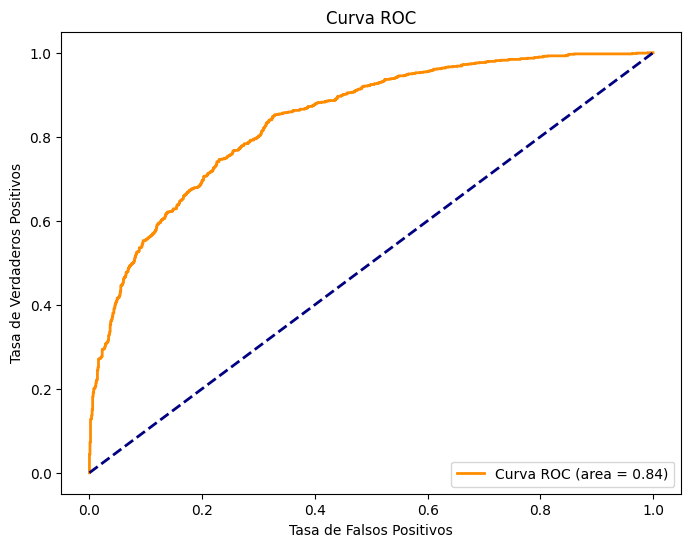

AUC: 0.8408623336340186


In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Entrenamos el mejor modelo (Naive Bayes en este caso)
modelo = MultinomialNB()
modelo.fit(X_train, y_train)

# Obtener las probabilidades de predicción
y_prob = modelo.predict_proba(X_test)[:, 1]

# Calcular las métricas para ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea aleatoria
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Mostrar AUC
print(f"AUC: {roc_auc}")
